## Import necassary modules

In [1]:
#Import necassary modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import PCA Modules
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
#Import Sklearn Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#Import Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,roc_curve,auc
#Import Preprocessing model
from sklearn.preprocessing import label_binarize


## Loading file

In [2]:
#Loading the train and test data
X_train = np.load('X_kannada_MNIST_train.npz')['arr_0']  #Loading training features
X_test = np.load('X_kannada_MNIST_test.npz')['arr_0']    #Loading testing features
y_train = np.load('y_kannada_MNIST_train.npz')['arr_0']  #Loading training labels
y_test = np.load('y_kannada_MNIST_test.npz')['arr_0']    #Loading testing labels

In [3]:
print(X_train.shape)  # Print the shape of the training features (number of samples, number of features)
print(X_test.shape)   # Print the shape of the testing features (number of samples, number of features)
print(y_train.shape)  # Print the shape of the training labels (number of samples,)
print(y_test.shape)   # Print the shape of the testing labels (number of samples,)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


## Visualizing data

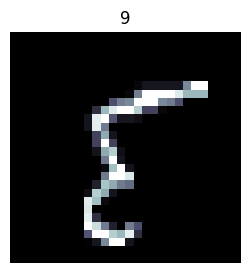

In [4]:
random_index = np.random.randint(0, X_train.shape[0])  # Randomly select an index from the training set
plt.figure(figsize=[3, 3])    
plt.imshow(X_train[random_index], cmap='bone')  # Display the image corresponding to the random index
plt.title(y_train[random_index])  # Set the title as the label of the image
plt.axis('off')  # Turn off the axis
plt.show()  # Display the plot

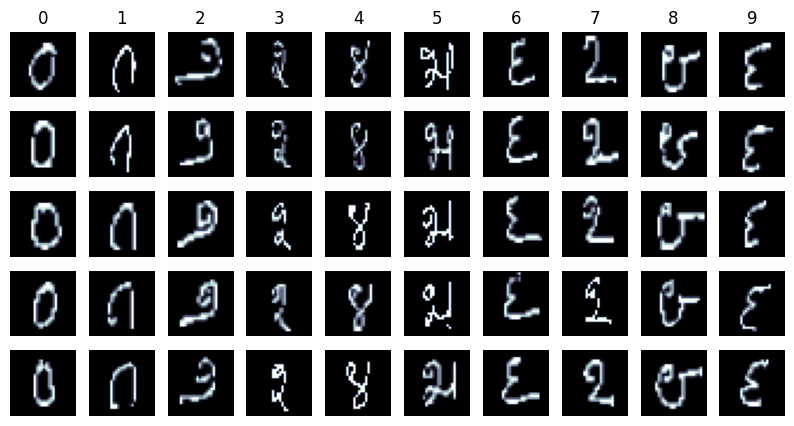

In [36]:
plt.figure(figsize=[10, 5])  # Set the figure size
for i in range(50):
    plt.subplot(5, 10, i + 1)  # Create subplots in a 5x10 grid
    plt.axis('off')  # Turn off the axis
    if i < 10:
        plt.title(y_train[i])  # Set the title of the first row as the label
    plt.imshow(X_train[i], cmap='bone')  # Display the image

## Preform PCA to 10 components

In [8]:
#Reshape the data into 2D array
X_train_reshaped = X_train.reshape(X_train.shape[0],-1)
X_test_reshaped = X_test.reshape(X_test.shape[0],-1)
#Initialize PCA with 10 components
pca = PCA(n_components=10)
#Fit PCA on training data and transform both training and test data
pca.fit(X_train_reshaped)
X_train_pca = pca.transform(X_train_reshaped)
X_test_pca = pca.transform(X_test_reshaped)
#Print the shape of transformed data 
print(X_train_pca.shape,X_test_pca.shape)

(60000, 10) (10000, 10)


*************************************************************DecisionTreeClassifier**********************************************************************


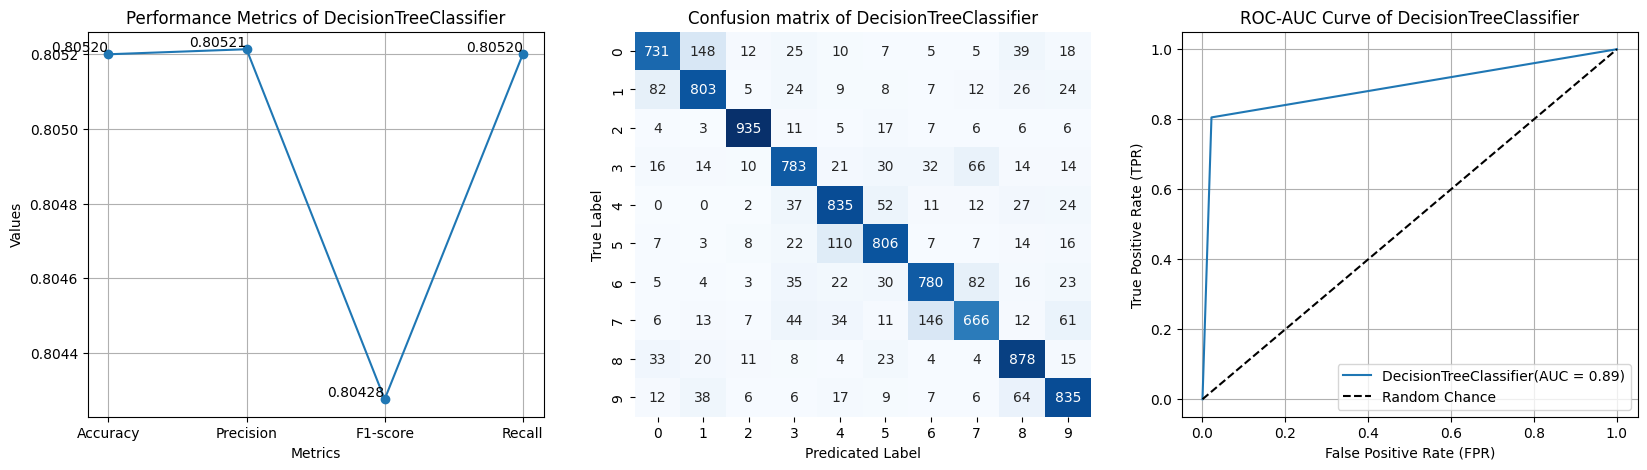

*************************************************************RandomForestClassifier**********************************************************************


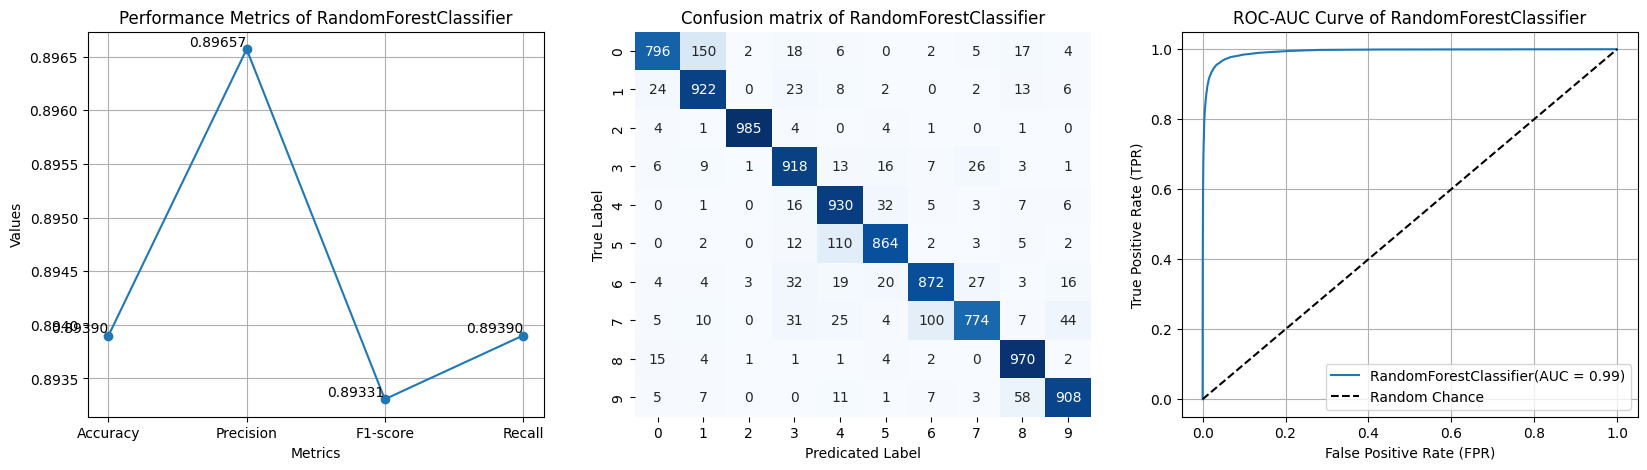

*************************************************************GaussianNB**********************************************************************


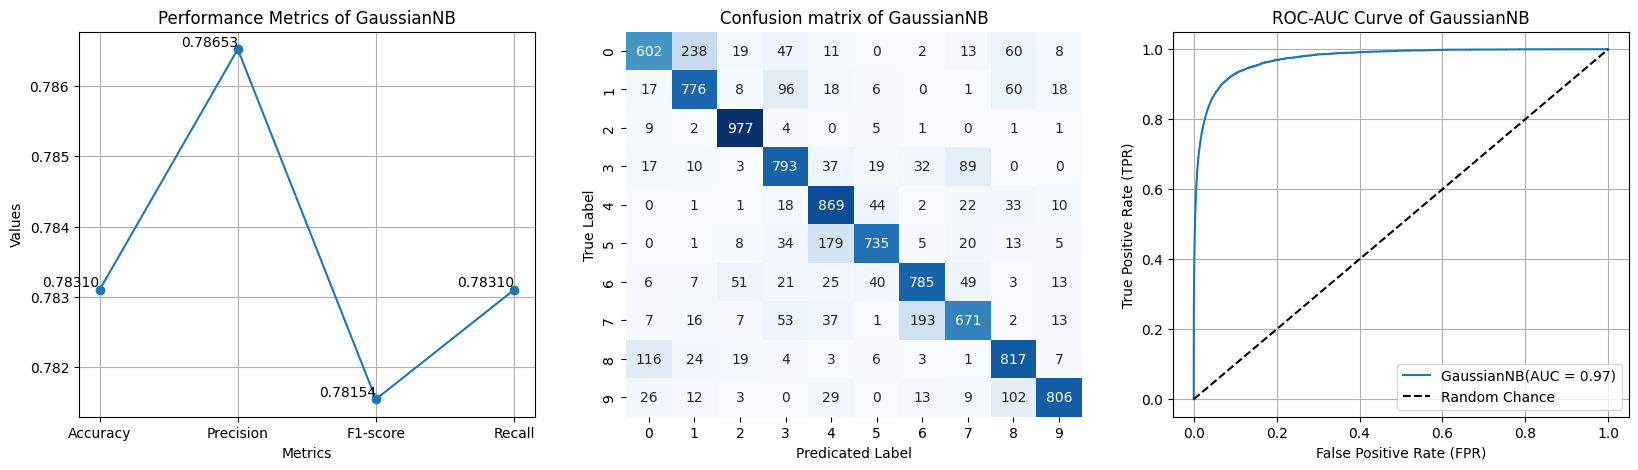

*************************************************************KNeighborsClassifier**********************************************************************


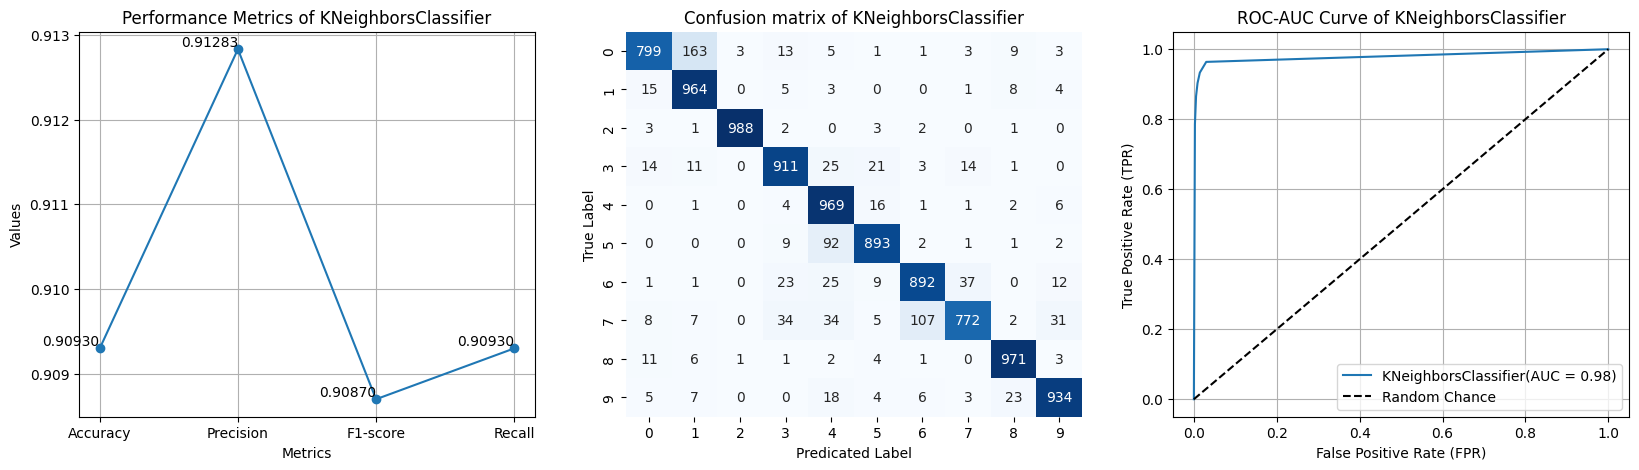

*************************************************************SVC**********************************************************************


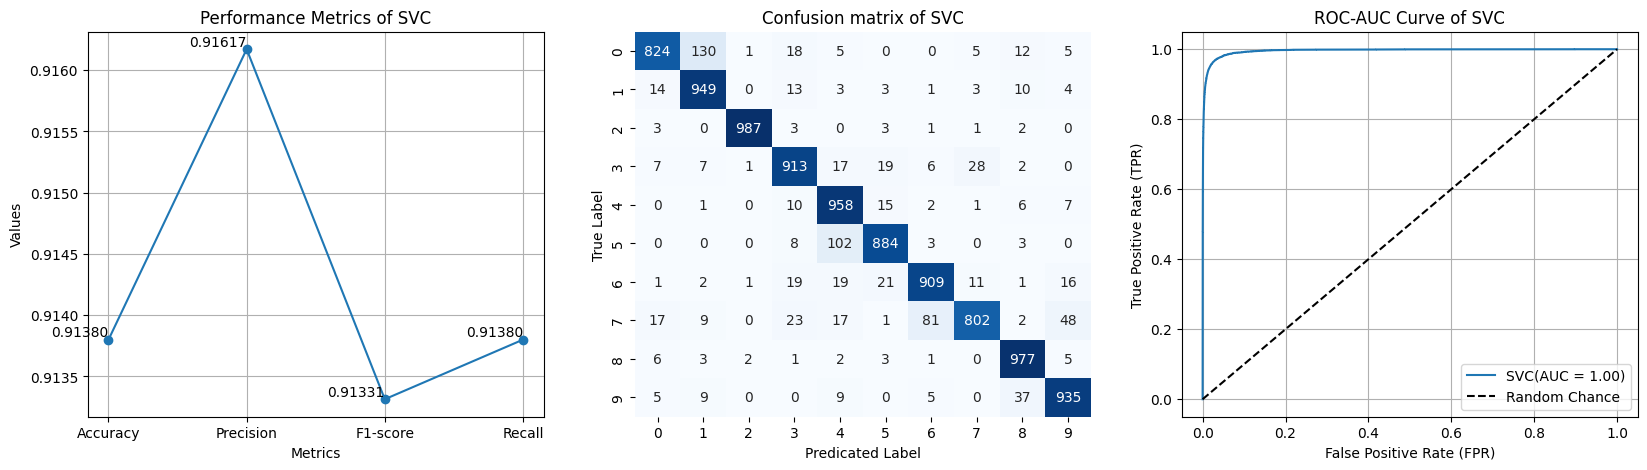

In [26]:
models = [DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),SVC(probability=True)]
for model in models:
    model.fit(X_train_pca, y_train)
    
    train_pred = model.predict(X_train_pca)
    test_pred = model.predict(X_test_pca)

    #Calculate performance metrics
    print(f"*************************************************************{type(model).__name__}**********************************************************************")
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred,average ='weighted')
    f1 = f1_score(y_test, test_pred,average ='weighted')
    recall = recall_score(y_test, test_pred,average ='weighted')

    #Visualize performance metrics
    metrics = ['Accuracy','Precision','F1-score','Recall']
    values = [accuracy,precision, f1, recall]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.plot(metrics, values, marker='o', linestyle='-')
    plt.title(f'Performance Metrics of {type(model).__name__}')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(True)

    #Adding labels to the data points
    for i in range(len(metrics)):
        plt.text(metrics[i], values[i], f'{values[i]:.5f}', ha='right', va='bottom')

    #Calculate confusion martix
    conf_mat = confusion_matrix(y_test,test_pred)
    
    #Visualize Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(conf_mat,annot=True, fmt="d",cmap='Blues',cbar=False)
    plt.title(f'Confusion matrix of {type(model).__name__}')
    plt.xlabel('Predicated Label')
    plt.ylabel('True Label')

    #Calculate ROC-AUC curve
    y_test_bin = label_binarize(y_test,classes=range(10))
    dt_pred_probs = model.predict_proba(X_test_pca)
    dt_fpr,dt_tpr,_ = roc_curve(y_test_bin.ravel(),dt_pred_probs.ravel())
    dt_auc = auc(dt_fpr,dt_tpr)
    
    #Visualize ROC-AUC curve
    plt.subplot(1,3,3)
    plt.title(f'ROC-AUC Curve of {type(model).__name__}')
    plt.plot(dt_fpr,dt_tpr,label=f'{type(model).__name__}(AUC = {dt_auc:.2f})'.format(dt_auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid(True)
    plt.show()

## Preform PCA to 15 components

In [13]:
#Reshape the data to a 2D array
X_train_reshaped = X_train.reshape(X_train.shape[0],-1)
X_test_reshaped = X_test.reshape(X_test.shape[0],-1)
#Initialize PCA with 15 components
pca = PCA(n_components=15)
#Fit PCA on training data and transform both training and testing data
pca.fit(X_train_reshaped)
X_train_pca_15 = pca.transform(X_train_reshaped)
X_test_pca_15 = pca.transform(X_test_reshaped)
#Print the shape of transformed data
print(X_train_pca_15.shape,X_test_pca_15.shape)

(60000, 15) (10000, 15)


*************************************************************DecisionTreeClassifier**********************************************************************


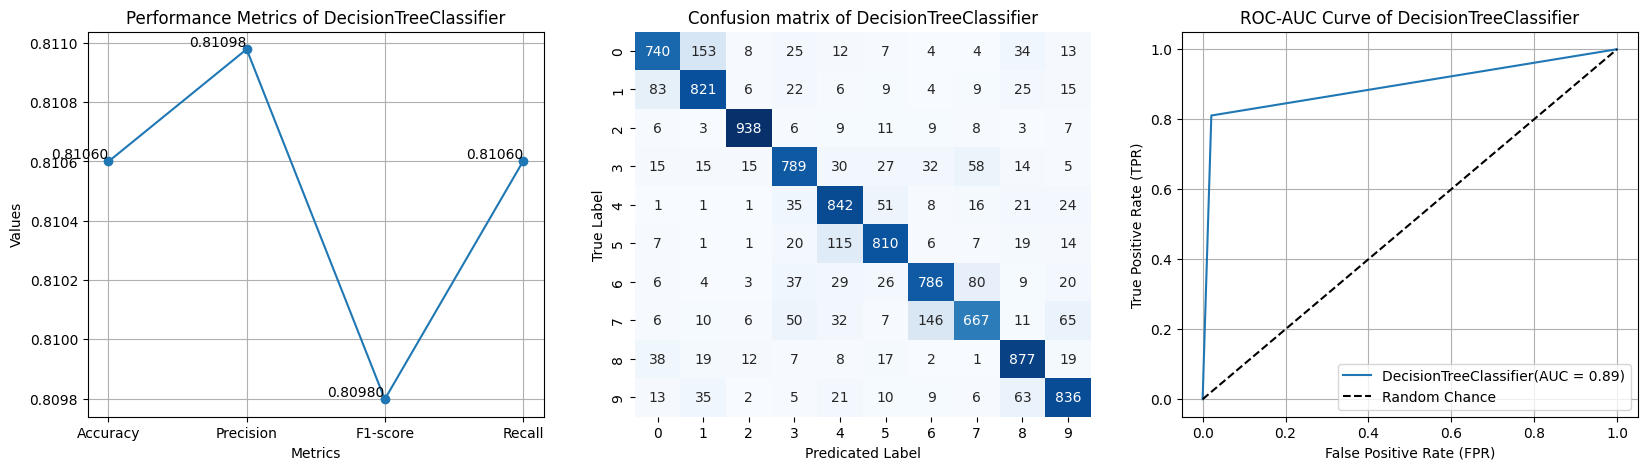

*************************************************************RandomForestClassifier**********************************************************************


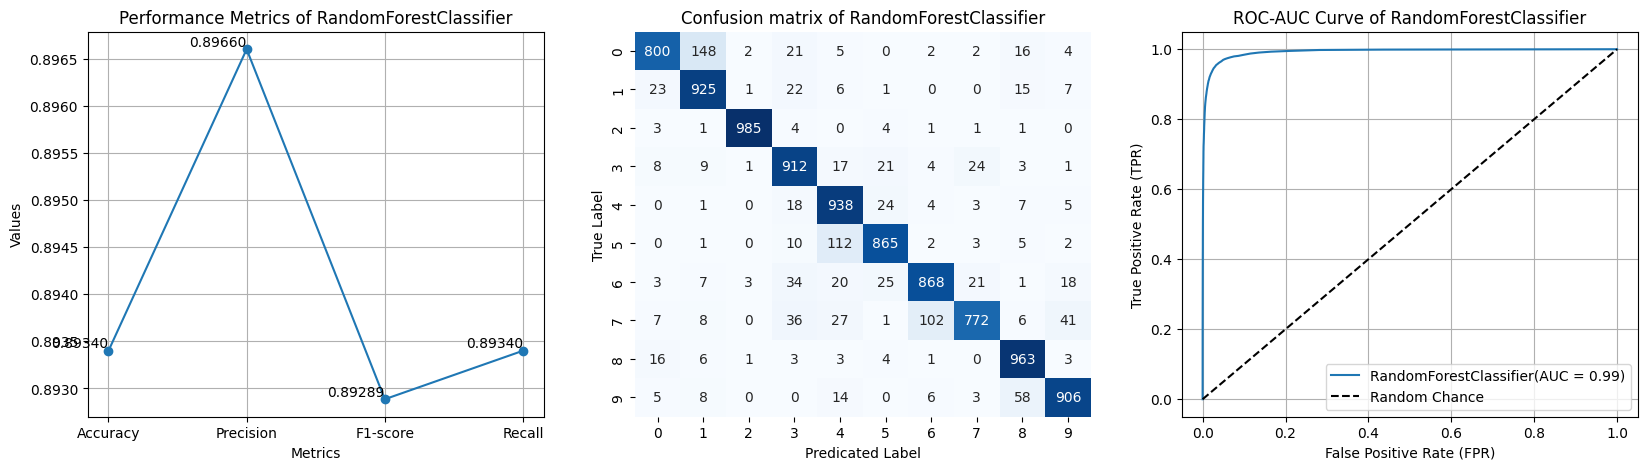

*************************************************************GaussianNB**********************************************************************


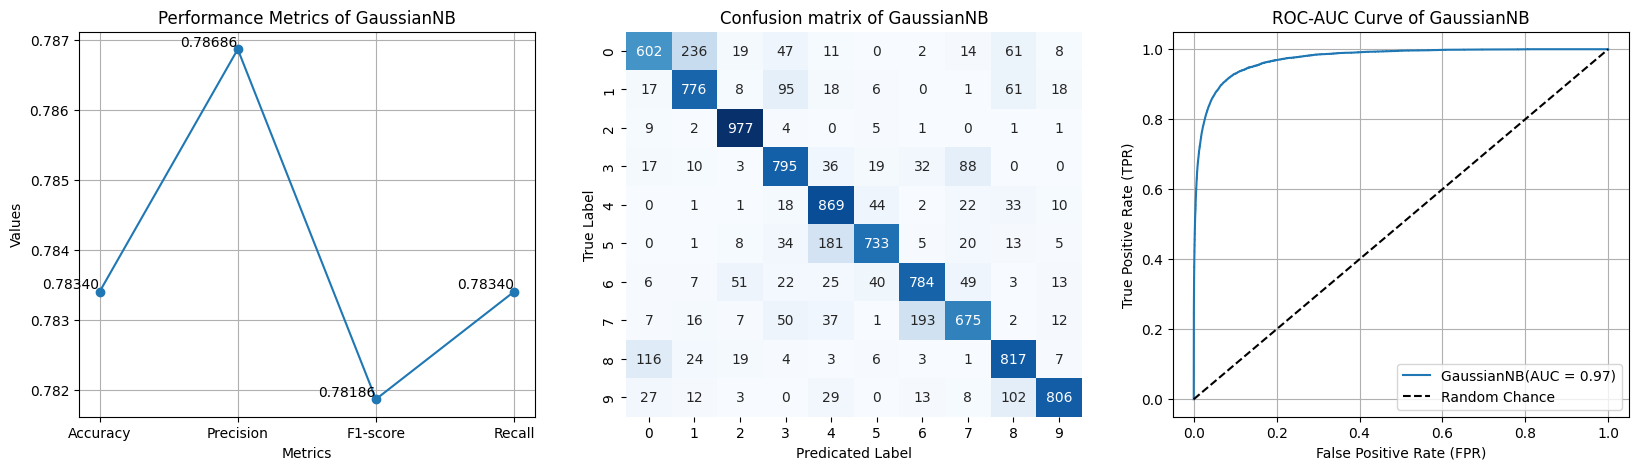

*************************************************************KNeighborsClassifier**********************************************************************


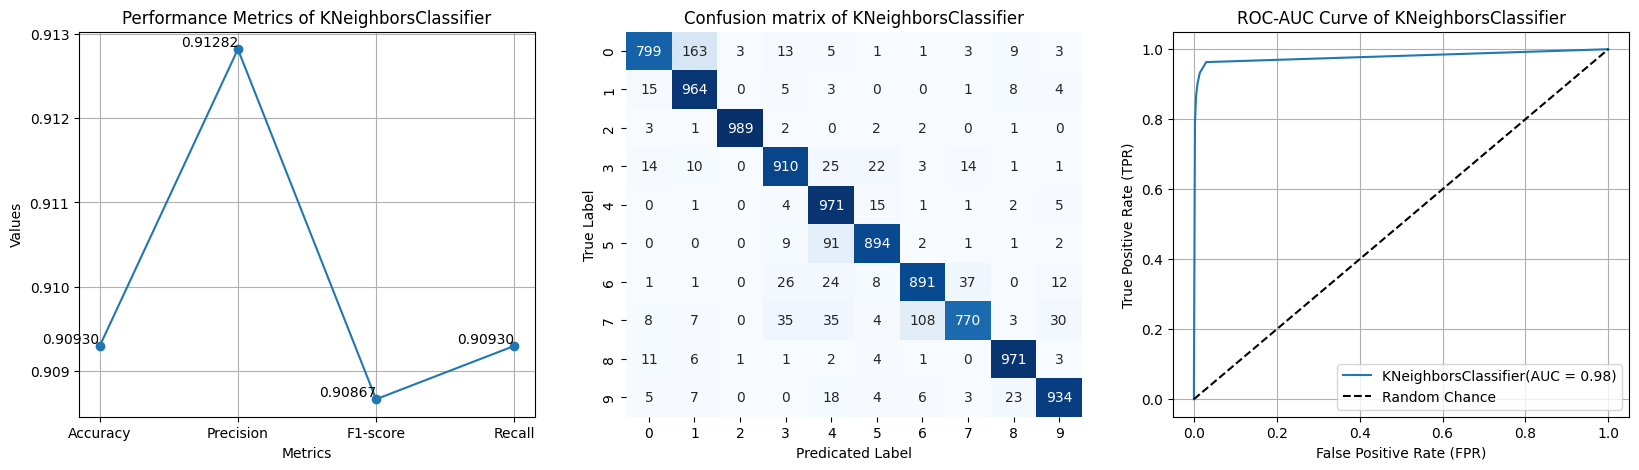

*************************************************************SVC**********************************************************************


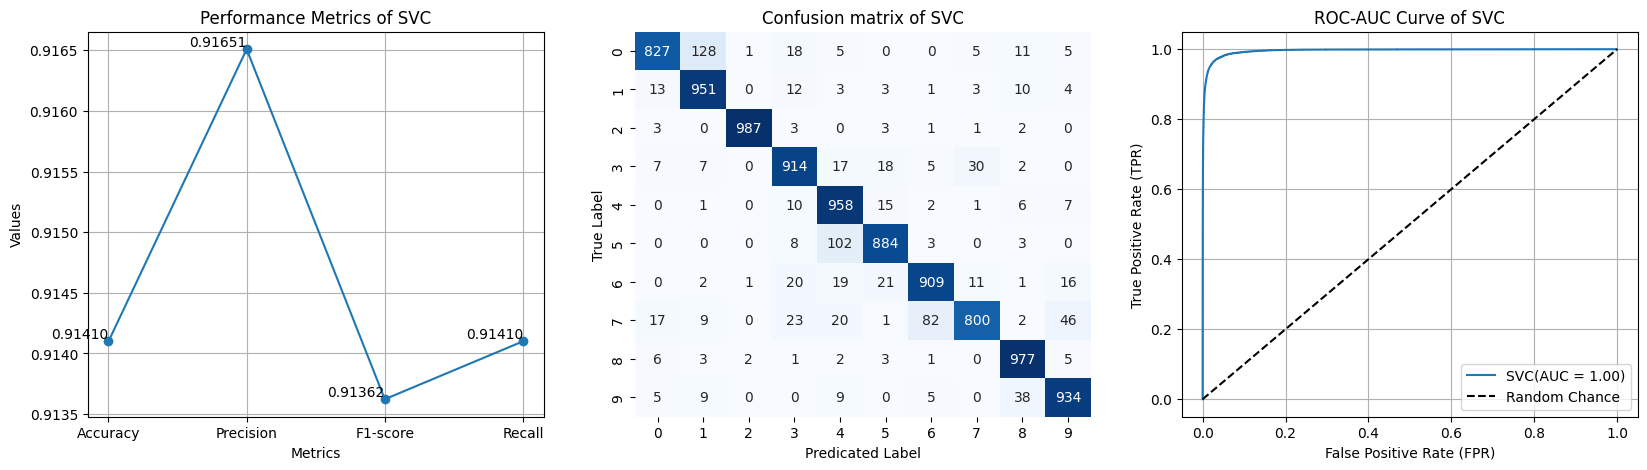

In [25]:
models = [DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),SVC(probability=True)]
for model in models:
    model.fit(X_train_pca, y_train)
    
    train_pred = model.predict(X_train_pca_15)
    test_pred = model.predict(X_test_pca_15)

    #Calculate performance metrics
    print(f"*************************************************************{type(model).__name__}**********************************************************************")
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred,average ='weighted')
    f1 = f1_score(y_test, test_pred,average ='weighted')
    recall = recall_score(y_test, test_pred,average ='weighted')
    
    #Visualize performance metrics
    metrics = ['Accuracy','Precision','F1-score','Recall']
    values = [accuracy,precision, f1, recall]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.plot(metrics, values, marker='o', linestyle='-')
    plt.title(f'Performance Metrics of {type(model).__name__}')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(True)
    #Adding labels to the data points
    for i in range(len(metrics)):
        plt.text(metrics[i], values[i], f'{values[i]:.5f}', ha='right', va='bottom')

    #Calculate Confusion Martix
    conf_mat = confusion_matrix(y_test,test_pred)

    #Visualize Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(conf_mat,annot=True, fmt="d",cmap='Blues',cbar=False)
    plt.title(f'Confusion matrix of {type(model).__name__}')
    plt.xlabel('Predicated Label')
    plt.ylabel('True Label')

    #Calculate ROC-AUC curve
    y_test_bin = label_binarize(y_test,classes=range(10))
    dt_pred_probs = model.predict_proba(X_test_pca_15)
    dt_fpr,dt_tpr,_ = roc_curve(y_test_bin.ravel(),dt_pred_probs.ravel())
    dt_auc = auc(dt_fpr,dt_tpr)

    #Visualize ROC-AUC curve
    plt.subplot(1,3,3)
    plt.title(f'ROC-AUC Curve of {type(model).__name__}')
    plt.plot(dt_fpr,dt_tpr,label=f'{type(model).__name__}(AUC = {dt_auc:.2f})'.format(dt_auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid(True)
    plt.show()

## Preform PCA to 20 components

In [15]:
#Reshape the data into 2D array
X_train_reshaped = X_train.reshape(X_train.shape[0],-1)
X_test_reshaped = X_test.reshape(X_test.shape[0],-1)

#Initialize PCA with 20 components
pca = PCA(n_components=20)

#Fit PCA on training data and transform both training and test data
pca.fit(X_train_reshaped)
X_train_pca_20 = pca.transform(X_train_reshaped)
X_test_pca_20 = pca.transform(X_test_reshaped)

#Print the shape of transform data
print(X_train_pca_20.shape,X_test_pca_20.shape)

(60000, 20) (10000, 20)


*************************************************************DecisionTreeClassifier**********************************************************************


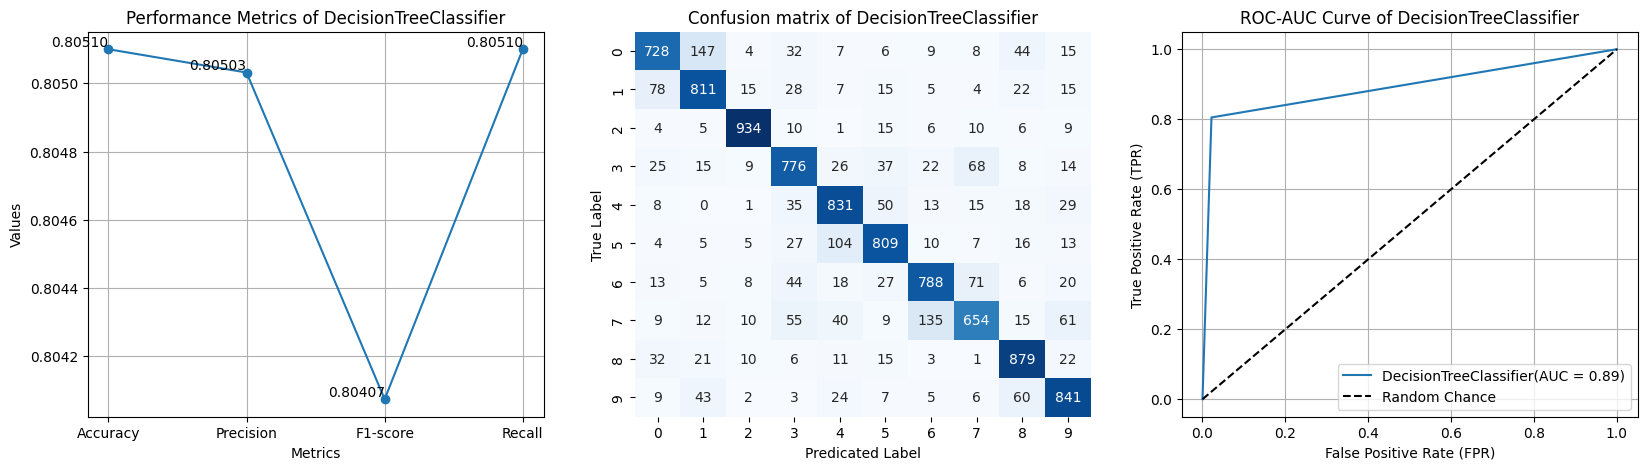

*************************************************************RandomForestClassifier**********************************************************************


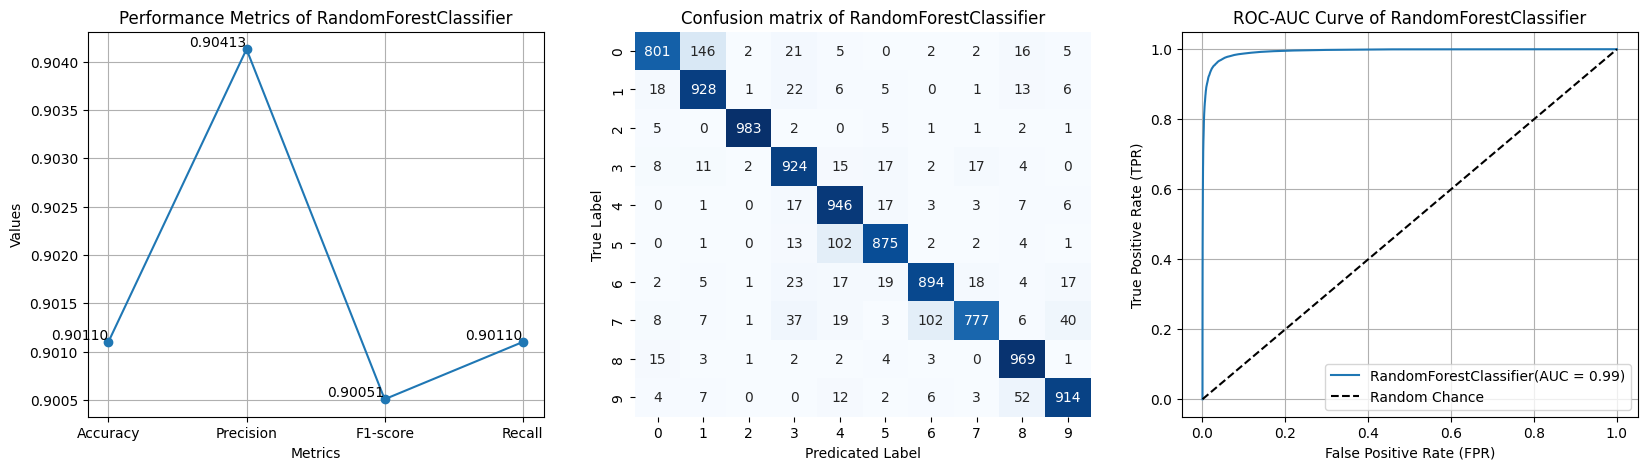

*************************************************************GaussianNB**********************************************************************


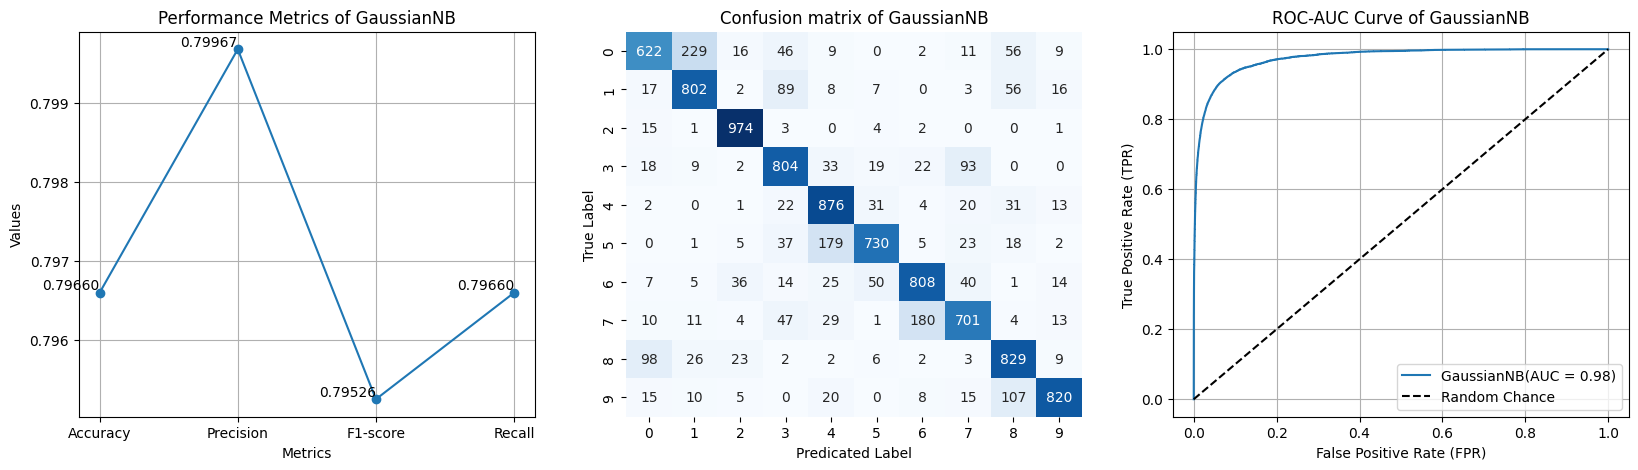

*************************************************************KNeighborsClassifier**********************************************************************


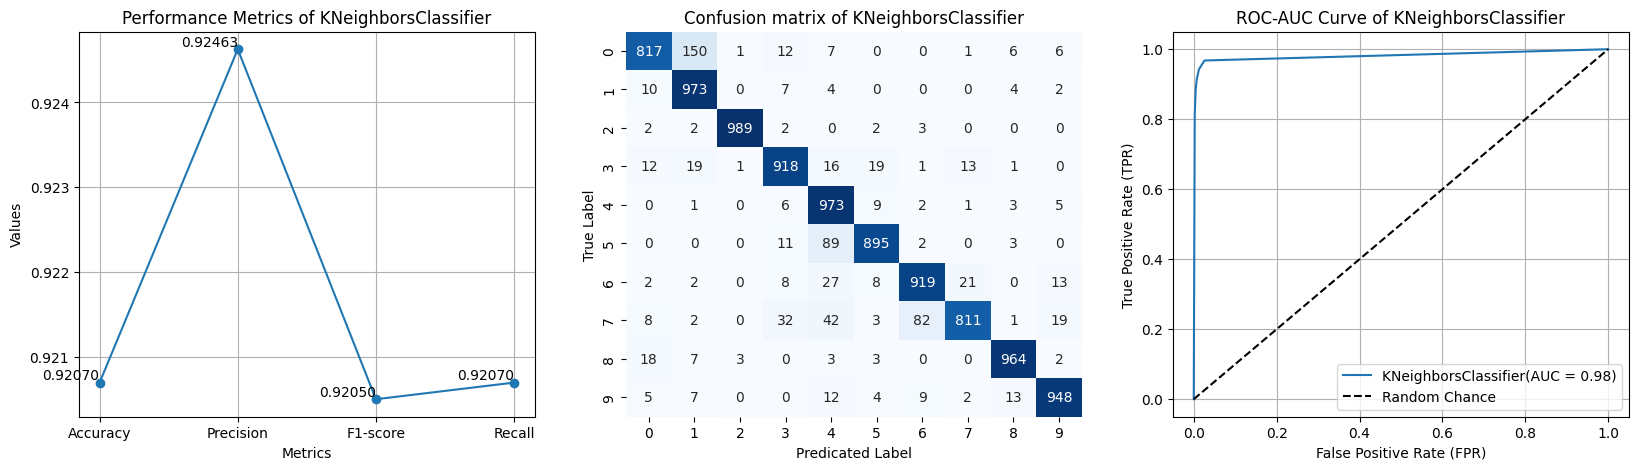

*************************************************************SVC**********************************************************************


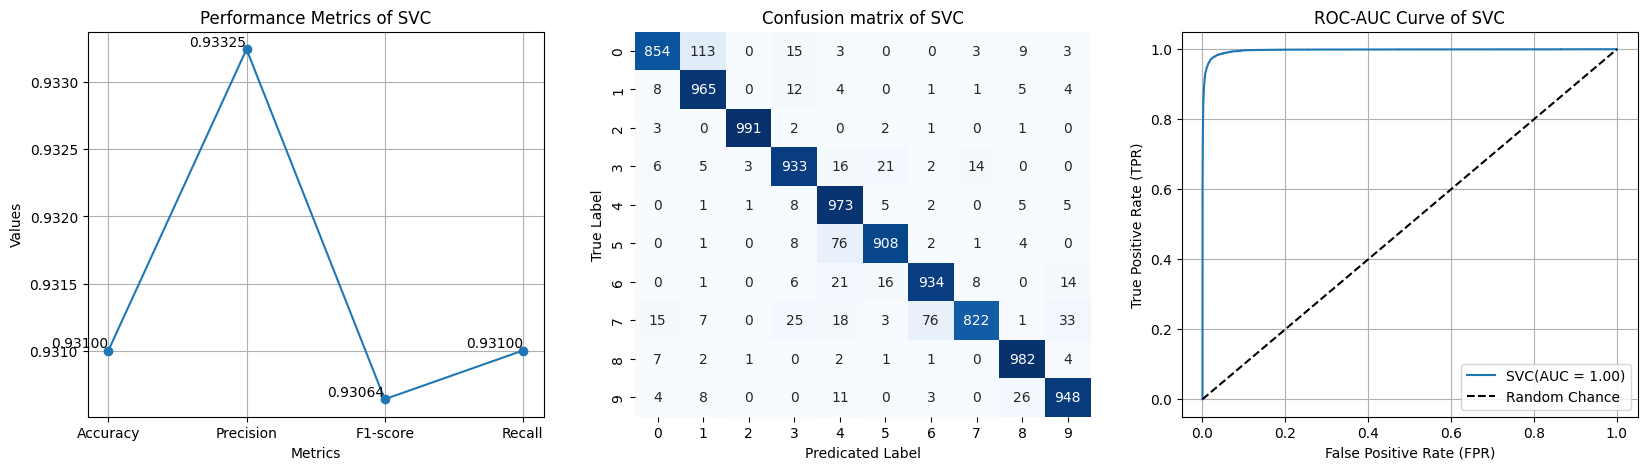

In [24]:
models = [DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),SVC(probability=True)]
for model in models:
    model.fit(X_train_pca_20, y_train)
    
    train_pred = model.predict(X_train_pca_20)
    test_pred = model.predict(X_test_pca_20)

    #Calculate performance metrics
    print(f"*************************************************************{type(model).__name__}**********************************************************************")
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred,average ='weighted')
    f1 = f1_score(y_test, test_pred,average ='weighted')
    recall = recall_score(y_test, test_pred,average ='weighted')
    
    #Visualize performance metrics
    metrics = ['Accuracy','Precision','F1-score','Recall']
    values = [accuracy,precision, f1, recall]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.plot(metrics, values, marker='o', linestyle='-')
    plt.title(f'Performance Metrics of {type(model).__name__}')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(True)

    # Adding labels to the data points
    for i in range(len(metrics)):
        plt.text(metrics[i], values[i], f'{values[i]:.5f}', ha='right', va='bottom')

    #Calculate Confusion Martix
    conf_mat = confusion_matrix(y_test,test_pred)

    #Visualize Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(conf_mat,annot=True, fmt="d",cmap='Blues',cbar=False)
    plt.title(f'Confusion matrix of {type(model).__name__}')
    plt.xlabel('Predicated Label')
    plt.ylabel('True Label')

    #Calculate ROC-AUC curve
    y_test_bin = label_binarize(y_test,classes=range(10))
    dt_pred_probs = model.predict_proba(X_test_pca_20)
    dt_fpr,dt_tpr,_ = roc_curve(y_test_bin.ravel(),dt_pred_probs.ravel())
    dt_auc = auc(dt_fpr,dt_tpr)

    #Visualize ROC-AUC curve
    plt.subplot(1,3,3)
    plt.title(f'ROC-AUC Curve of {type(model).__name__}')
    plt.plot(dt_fpr,dt_tpr,label=f'{type(model).__name__}(AUC = {dt_auc:.2f})'.format(dt_auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid(True)
    plt.show()

## Preform PCA to 25 components

In [17]:
#Reshape the data to a 2D array
X_train_reshaped = X_train.reshape(X_train.shape[0],-1)
X_test_reshaped = X_test.reshape(X_test.shape[0],-1)

#Initialize PCA with 25 components
pca = PCA(n_components=25)

#Fit PCA on training data and transform both training and testing data
pca.fit(X_train_reshaped)
X_train_pca_25 = pca.transform(X_train_reshaped)
X_test_pca_25 = pca.transform(X_test_reshaped)

#Print the shape of transformed data
print(X_train_pca_25.shape,X_test_pca_25.shape)

(60000, 25) (10000, 25)


*************************************************************DecisionTreeClassifier**********************************************************************


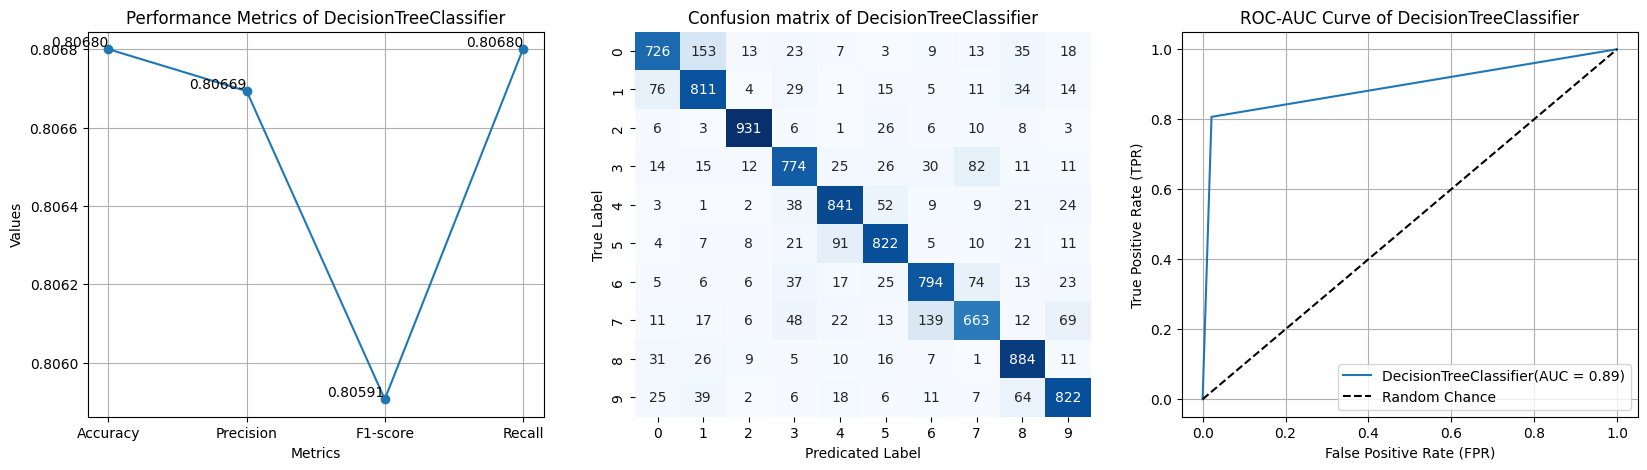

*************************************************************RandomForestClassifier**********************************************************************


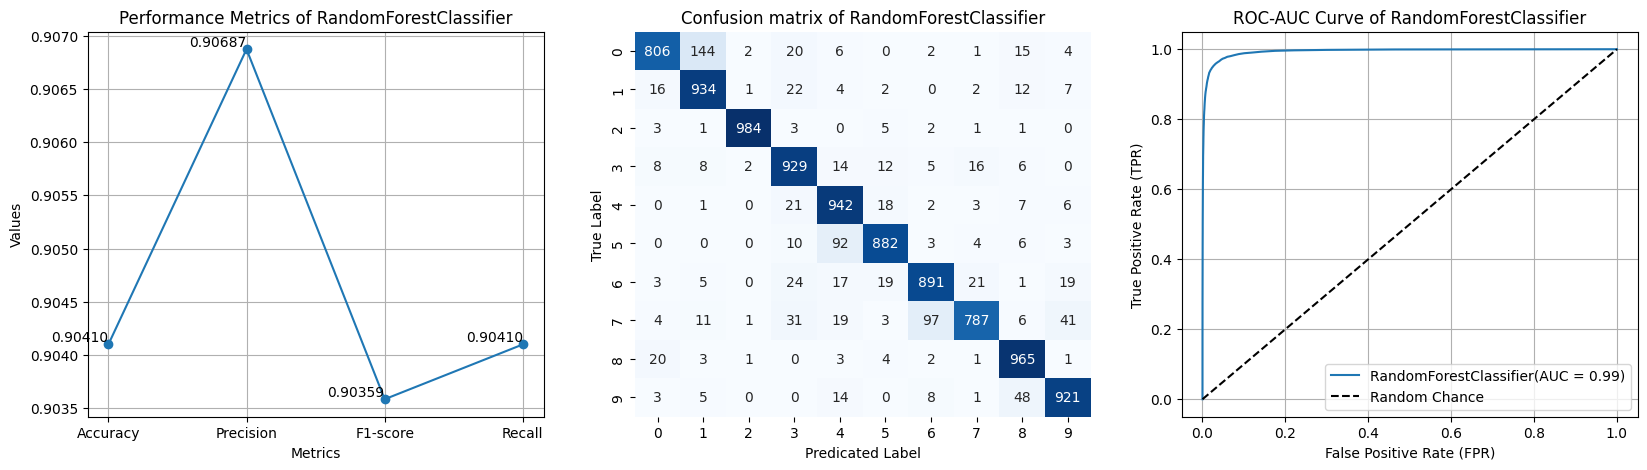

*************************************************************GaussianNB**********************************************************************


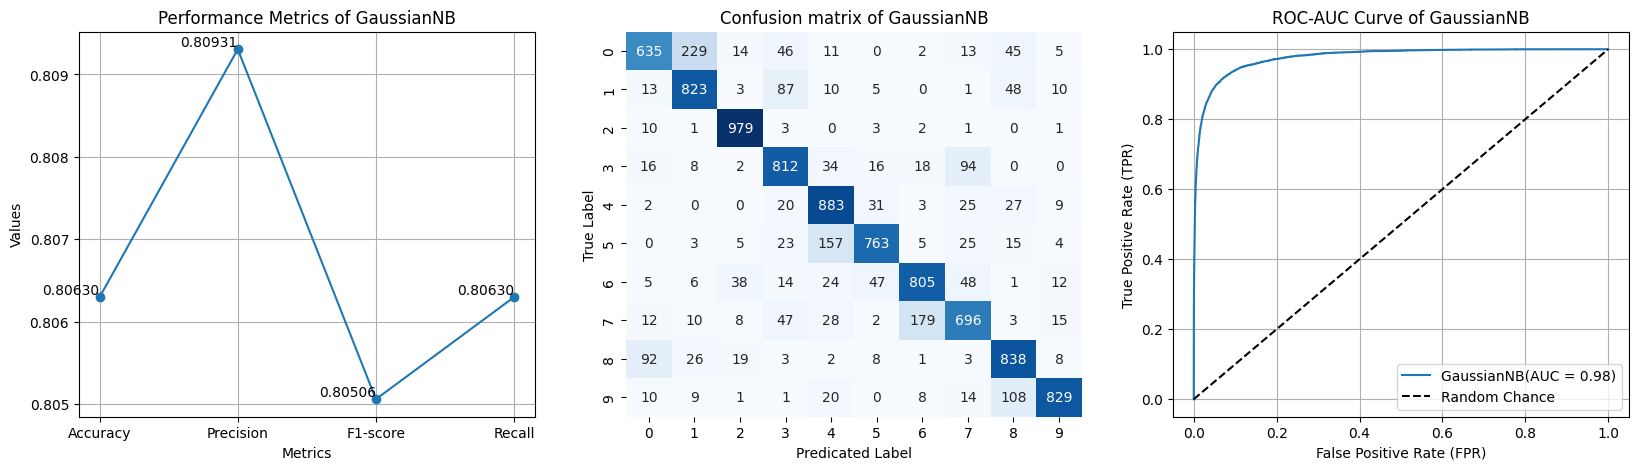

*************************************************************KNeighborsClassifier**********************************************************************


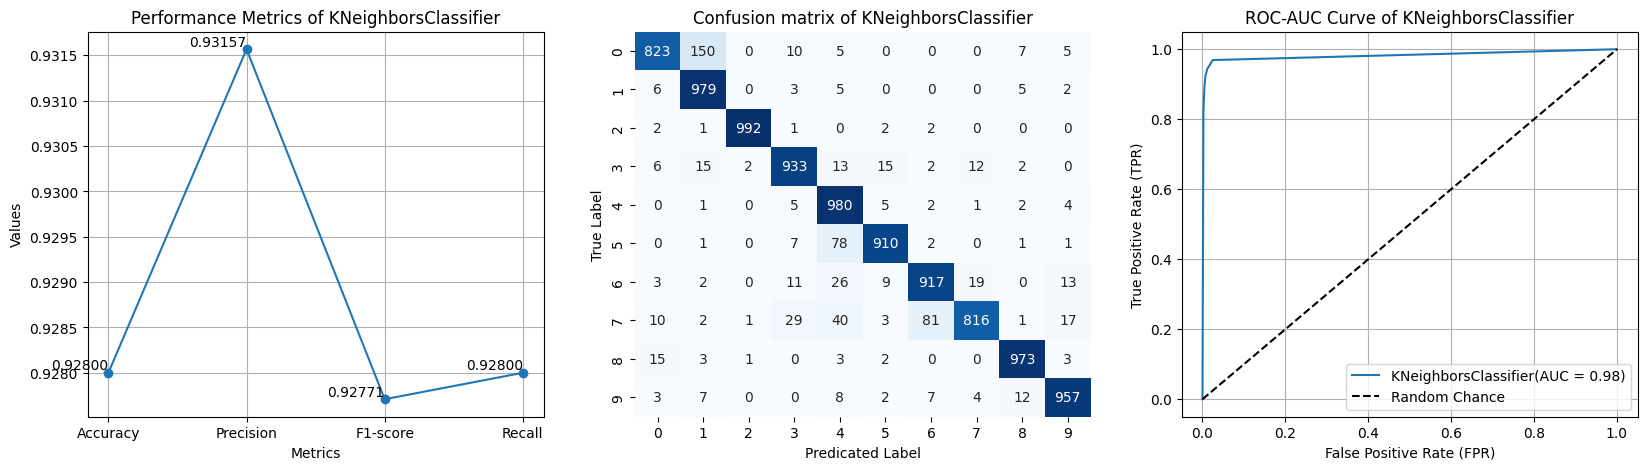

*************************************************************SVC**********************************************************************


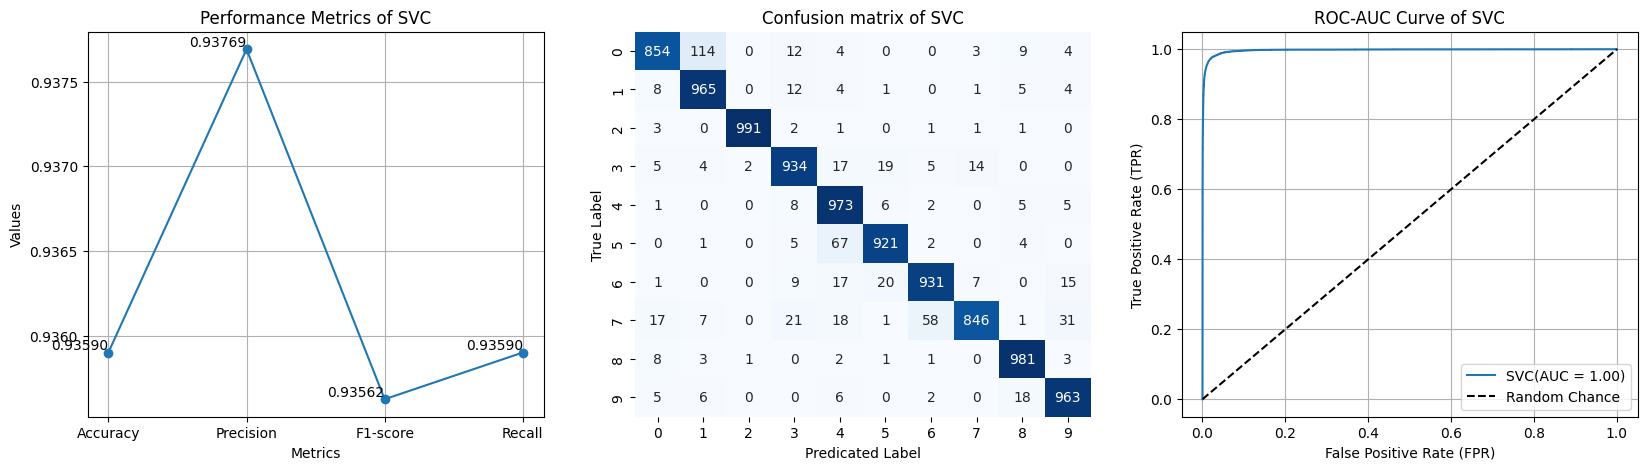

In [22]:
models = [DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),SVC(probability=True)]
for model in models:
    model.fit(X_train_pca_25, y_train)
    
    train_pred = model.predict(X_train_pca_25)
    test_pred = model.predict(X_test_pca_25)

    #Calculate performance metrics
    print(f"*************************************************************{type(model).__name__}**********************************************************************")
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred,average ='weighted')
    f1 = f1_score(y_test, test_pred,average ='weighted')
    recall = recall_score(y_test, test_pred,average ='weighted')
    
    #Visualize performance metrics
    metrics = ['Accuracy','Precision','F1-score','Recall']
    values = [accuracy,precision, f1, recall]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.plot(metrics, values, marker='o', linestyle='-')
    plt.title(f'Performance Metrics of {type(model).__name__}')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(True)

    #Adding labels to the data points
    for i in range(len(metrics)):
        plt.text(metrics[i], values[i], f'{values[i]:.5f}', ha='right', va='bottom')

    #Calculate Confusion Martix
    conf_mat = confusion_matrix(y_test,test_pred)

    #Visualize Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(conf_mat,annot=True, fmt="d",cmap='Blues',cbar=False)
    plt.title(f'Confusion matrix of {type(model).__name__}')
    plt.xlabel('Predicated Label')
    plt.ylabel('True Label')

    #Calculate ROC-AUC curve
    y_test_bin = label_binarize(y_test,classes=range(10))
    dt_pred_probs = model.predict_proba(X_test_pca_25)
    dt_fpr,dt_tpr,_ = roc_curve(y_test_bin.ravel(),dt_pred_probs.ravel())
    dt_auc = auc(dt_fpr,dt_tpr)

    #Visualize ROC-AUC curve
    plt.subplot(1,3,3)
    plt.title(f'ROC-AUC Curve of {type(model).__name__}')
    plt.plot(dt_fpr,dt_tpr,label=f'{type(model).__name__}(AUC = {dt_auc:.2f})'.format(dt_auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid(True)
    plt.show()

## Preform PCA to 30 components

In [20]:
#Reshape the data to a 2D array
X_train_reshaped = X_train.reshape(X_train.shape[0],-1)
X_test_reshaped = X_test.reshape(X_test.shape[0],-1)

#Initialize Incremental PCA with 30 components
pca = IncrementalPCA(n_components=30)

#Fit Incremental PCA on training data and transform both training and testing data
pca.fit(X_train_reshaped)
X_train_pca_30 = pca.transform(X_train_reshaped)
X_test_pca_30 = pca.transform(X_test_reshaped)

#Print the shape of transformed data
print(X_train_pca_30.shape,X_test_pca_30.shape)

(60000, 30) (10000, 30)


*************************************************************DecisionTreeClassifier**********************************************************************


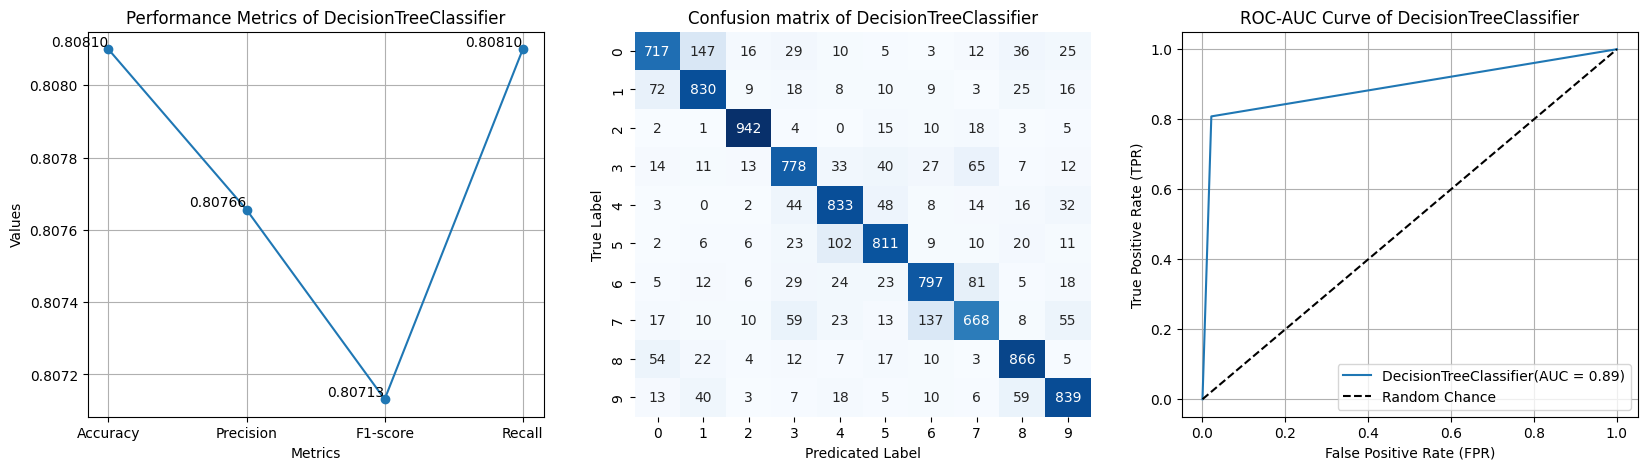

*************************************************************RandomForestClassifier**********************************************************************


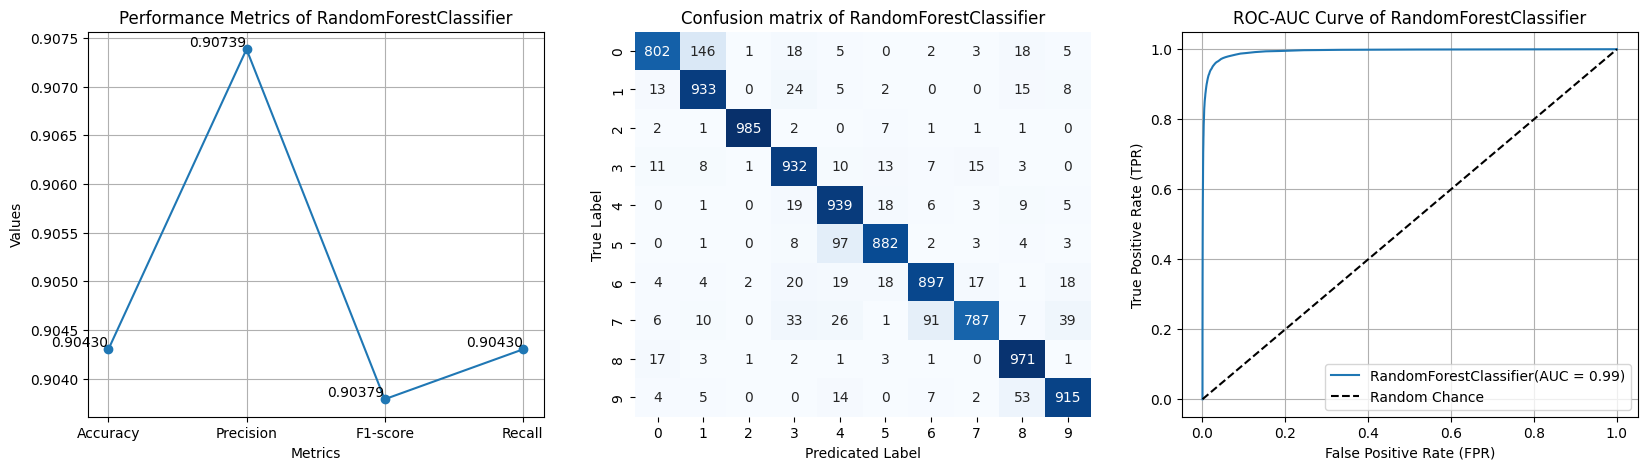

*************************************************************GaussianNB**********************************************************************


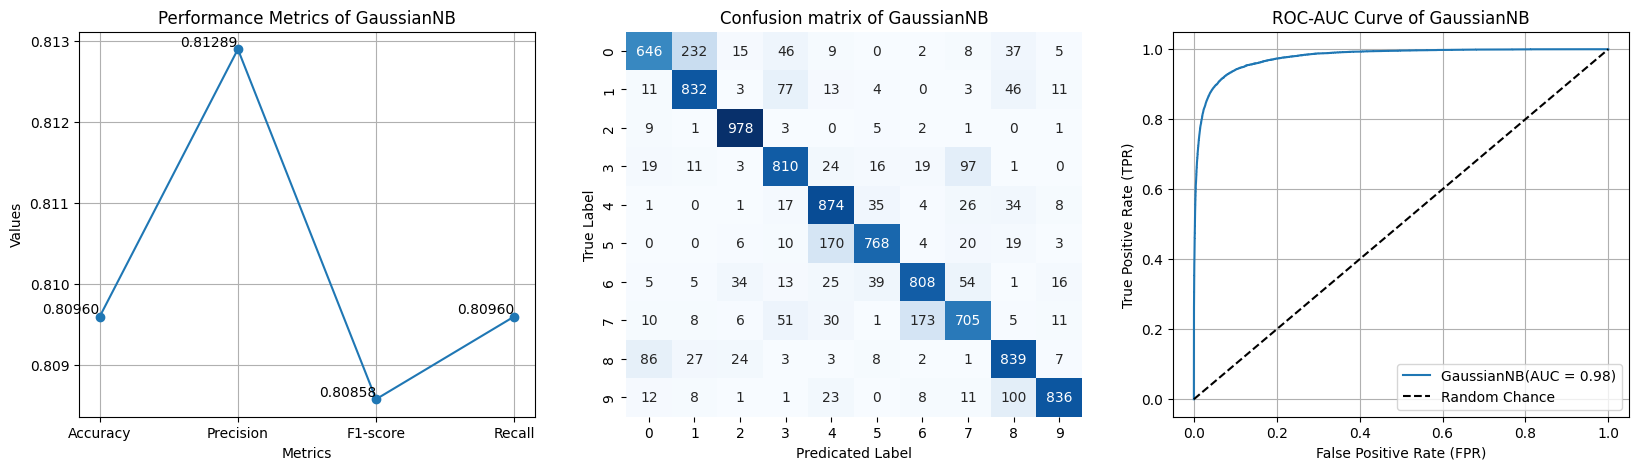

*************************************************************KNeighborsClassifier**********************************************************************


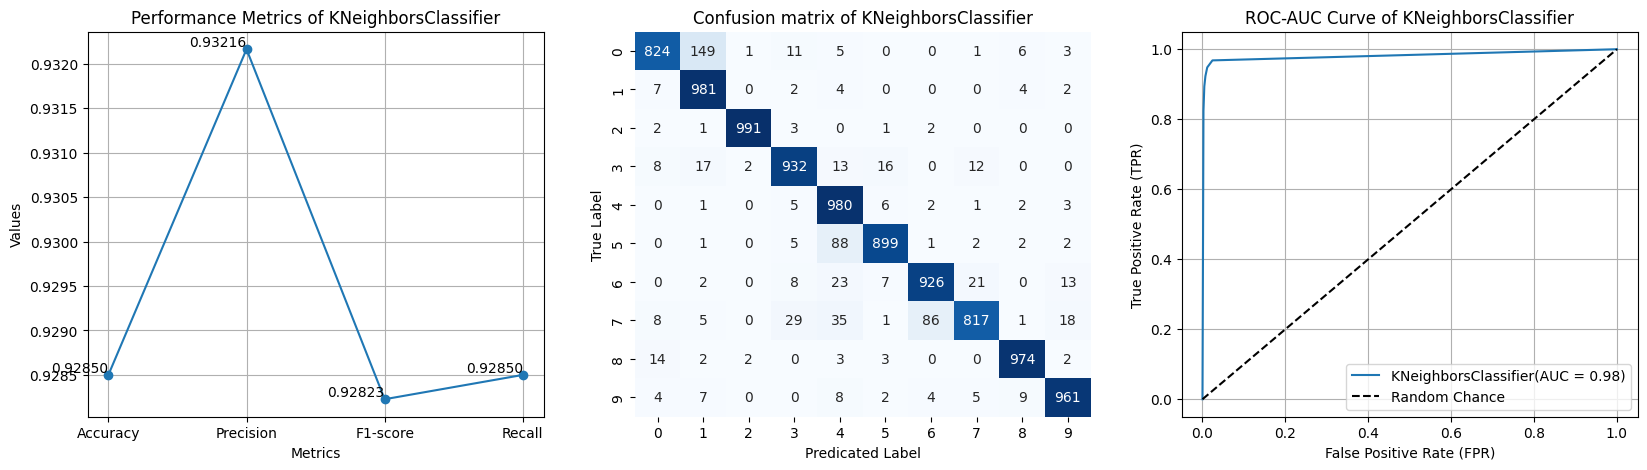

*************************************************************SVC**********************************************************************


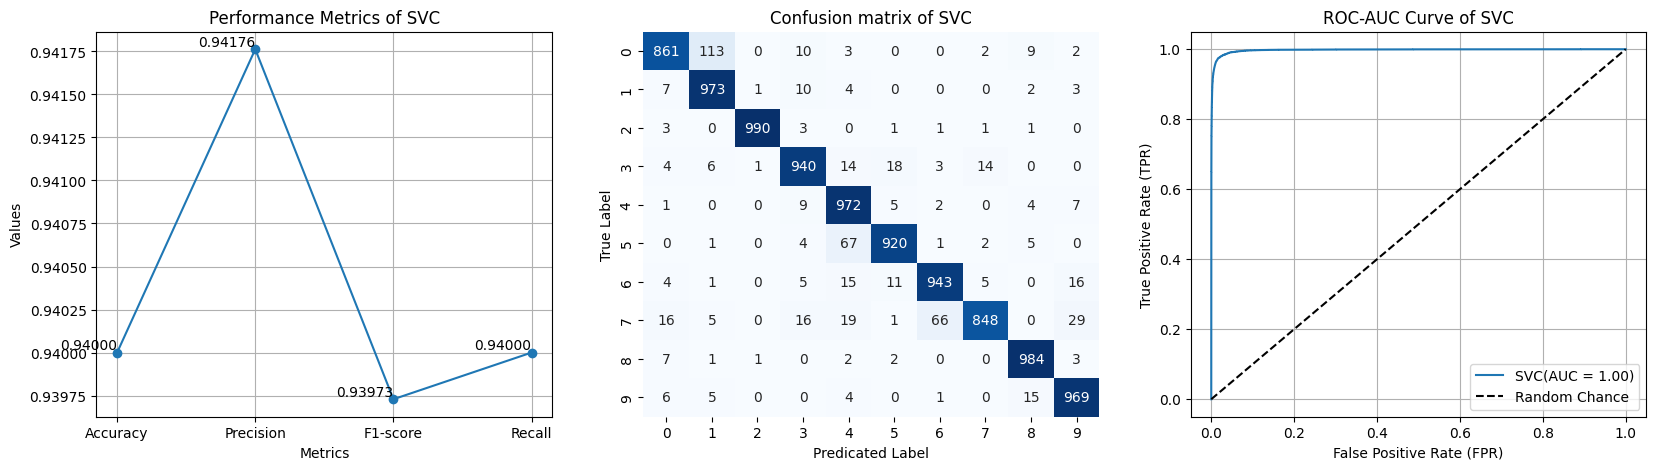

In [21]:
models = [DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),SVC(probability=True)]
for model in models:
    model.fit(X_train_pca_30, y_train)
    
    train_pred = model.predict(X_train_pca_30)
    test_pred = model.predict(X_test_pca_30)

    #Calculate performance metrics
    print(f"*************************************************************{type(model).__name__}**********************************************************************")
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred,average ='weighted')
    f1 = f1_score(y_test, test_pred,average ='weighted')
    recall = recall_score(y_test, test_pred,average ='weighted')
    
    #Visualize performance metrics
    metrics = ['Accuracy','Precision','F1-score','Recall']
    values = [accuracy,precision, f1, recall]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.plot(metrics, values, marker='o', linestyle='-')
    plt.title(f'Performance Metrics of {type(model).__name__}')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(True)

    #Adding labels to the data points
    for i in range(len(metrics)):
        plt.text(metrics[i], values[i], f'{values[i]:.5f}', ha='right', va='bottom')

    #Calculate Confusion Martix
    conf_mat = confusion_matrix(y_test,test_pred)

    #Visualize Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(conf_mat,annot=True, fmt="d",cmap='Blues',cbar=False)
    plt.title(f'Confusion matrix of {type(model).__name__}')
    plt.xlabel('Predicated Label')
    plt.ylabel('True Label')

    #find ROC-AUC curve
    y_test_bin = label_binarize(y_test,classes=range(10))
    dt_pred_probs = model.predict_proba(X_test_pca_30)
    dt_fpr,dt_tpr,_ = roc_curve(y_test_bin.ravel(),dt_pred_probs.ravel())
    dt_auc = auc(dt_fpr,dt_tpr)

    #Visualize ROC-AUC curve
    plt.subplot(1,3,3)
    plt.title(f'ROC-AUC Curve of {type(model).__name__}')
    plt.plot(dt_fpr,dt_tpr,label=f'{type(model).__name__}(AUC = {dt_auc:.2f})'.format(dt_auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid(True)
    plt.show()